In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import csv

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras import layers
from sklearn.metrics import confusion_matrix

images = np.load('DS_Xdata.npy')
label = np.load('Ydata.npy')

# SVM IMPLEMENTATION

This cell extracts the features so that they can be used by the SVM algorithm

In [278]:
#extracting features using hog
feature_list= []
for single_image in images:
    feature_list.append(skimage.feature.hog(single_image, pixels_per_cell=[8,8], cells_per_block=[2,2],channel_axis=2))
numpy_feature_list = np.array(feature_list)

#splitting into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(numpy_feature_list, label, test_size=0.2, random_state=None)

y_train_rav = y_train.ravel()
y_test_rav = y_test.ravel()

#matrix of hyperparameters, every combination in this matrix is tested
hyperparameters = {
    'C': [1, 0.1, 10, 5, 100],
    'kernel': ['linear', 'rbf' , 'poly', 'sigmoid'],
    'gamma': ['auto','scale'],
}

#creating the svc object then testing every combination
tester_svm = SVC()
svm_grid_search = GridSearchCV(estimator=tester_svm, param_grid=hyperparameters)
svm_grid_search.fit(x_train, y_train_rav)
print("Best:", svm_grid_search.best_params_)

Best: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In this cell i implement the best parameters, tweaking the C value in hopes to achieve en optimal result

c:\Users\Gelato41\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy (SVM): 0.5595238095238095


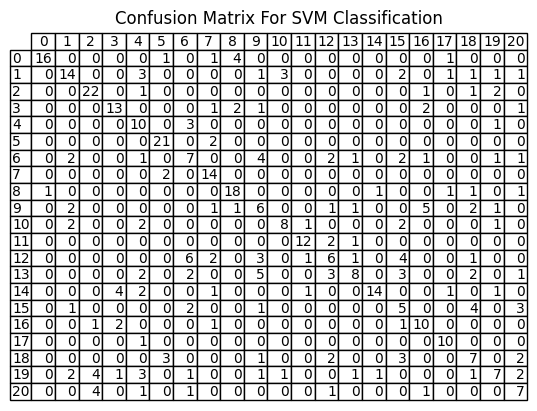

In [286]:
#extracting features using hog
feature_list= []
for single_image in images:
    feature_list.append(skimage.feature.hog(single_image, pixels_per_cell=[8,8], cells_per_block=[2,2],channel_axis=2))
numpy_feature_list = np.array(feature_list)

#splitting into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(numpy_feature_list, label, test_size=0.2, random_state=None)

#creating the svc object using the best parameters from the cell above
#i refrained from using the GridSearchCV's beset score value in order to perform more manual optimisation
SVM = SVC(C=15, gamma='scale' , kernel='rbf')
SVM.fit(x_train, y_train)

#predicting and plotting confusion matrix
svm_predicted = SVM.predict(x_test)
accuracy = accuracy_score(y_test, svm_predicted)
print("Test Accuracy (SVM):", accuracy)

confusion_matrix_svm = confusion_matrix(y_test, svm_predicted)
plt.table(cellText=confusion_matrix_svm, rowLabels=range(21), colLabels=range(21), loc='center')
plt.title('Confusion Matrix For SVM Classification')
plt.axis('off')
plt.show()

# CNN IMPLEMENTATION

In the cell below, i implement a CNN solution. Using the InspectionV3 model as a transfer model in order to achieve good classification whilst limiting the need for computational resources.

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 30s 185ms/step - accuracy: 0.0567 - loss: 3.4215 - val_accuracy: 0.1000 - val_loss: 2.9167
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.1072 - loss: 2.8660 - val_accuracy: 0.1381 - val_loss: 2.7140
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.1791 - loss: 2.6140 - val_accuracy: 0.1952 - val_loss: 2.5142
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.2702 - loss: 2.3682 - val_accuracy: 0.3000 - val_loss: 2.2514
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.3336 - loss: 2.1668 - val_accuracy: 0.3857 - val_loss: 2.0605
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.4519 - loss: 1.9212 - val_accuracy: 0.4238 - val_loss: 1.8664
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.5272 - loss: 1.7310 - val_accuracy: 0.4571 - val_loss: 1.7429
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.5770 - loss: 1.5278 - val_acc

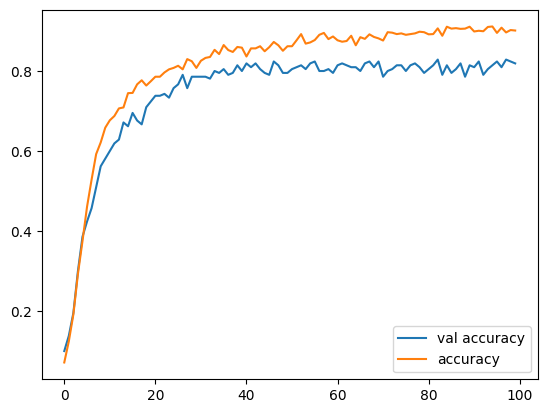

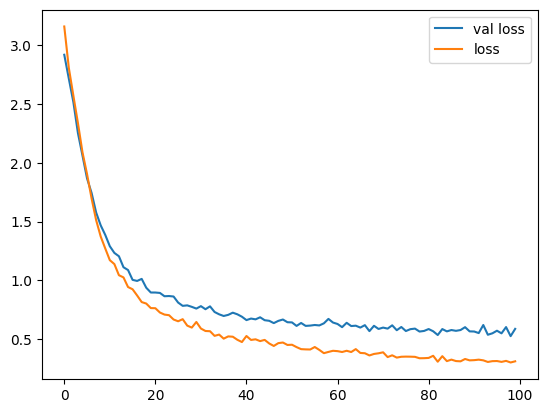

Test accuracy: 0.8190476298332214
accuracy scors: 0.819047619047619


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [281]:
#this object contains the augmentations i apply to each image. First i double the image size before flipping and rotating it
augment_pictures = keras.Sequential([
    layers.Resizing(122,122),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

#here i split the dataset into training, testing and validation sub-sets (80, 10, 10)
x_train, x_test, y_train, y_test = train_test_split(images, label, test_size=0.2, random_state=None)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=None)

#here i categorise the labels so that the categorical crossentropy loss function can be used
y_test_unencoded= y_test

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)

#normalising the datasets before training
x_train_normal = x_train / 255.0
x_test_normal = x_test / 255.0
x_val_normal = x_val / 255.0

#selecting my transfer learning base
transfer = keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(122, 122, 3))
transfer.trainable = False

#building the model
model = keras.Sequential([
    augment_pictures,
    transfer,
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(21, activation='softmax')
])

#compliling the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#training the model
fitting_data = model.fit(x_train_normal, y_train, epochs=100, validation_data=(x_val_normal, y_val))

#using 2 methods to evaluate performance
test_loss, test_acc = model.evaluate(x_test_normal, y_test)
cnn_predicted = model.predict(x_test_normal)
accuracy = accuracy_score(y_test_unencoded, cnn_predicted.argmax(axis=1))



#plotting accuracy graphs
plt.plot(fitting_data.history['val_accuracy'], label="val accuracy")
plt.plot(fitting_data.history['accuracy'], label="accuracy")
plt.legend()
plt.show()


#plotting loss graphs
plt.plot(fitting_data.history['val_loss'], label="val loss")
plt.plot(fitting_data.history['loss'], label="loss")
plt.legend()
plt.show()

print('Test accuracy:', test_acc)
print('accuracy scors:', accuracy)

#plotting confusion matrix
confusion_matrix_cnn = confusion_matrix(y_test_unencoded, cnn_predicted.argmax(axis=1))
plt.table(cellText=confusion_matrix_cnn, rowLabels=range(21), colLabels=range(21), loc='center')
plt.title('Confusion Matrix For CNN Classification')
plt.axis('off')
plt.show()



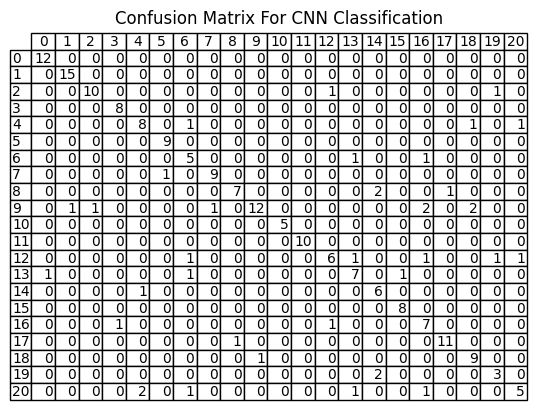

In [282]:
confusion_matrix_cnn = confusion_matrix(y_test_unencoded, cnn_predicted.argmax(axis=1))
plt.table(cellText=confusion_matrix_cnn, rowLabels=range(21), colLabels=range(21), loc='center')
plt.title('Confusion Matrix For CNN Classification')
plt.axis('off')
plt.show()